<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-датасетов" data-toc-modified-id="Загрузка-датасетов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка датасетов</a></span></li><li><span><a href="#Изучение-основной-информации-о-датасетах" data-toc-modified-id="Изучение-основной-информации-о-датасетах-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение основной информации о датасетах</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-и-устранение-пропусков" data-toc-modified-id="Анализ-и-устранение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ и устранение пропусков</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li><li><span><a href="#Проверка-на-мультиколлинеарность-и-анализ-корреляций" data-toc-modified-id="Проверка-на-мультиколлинеарность-и-анализ-корреляций-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка на мультиколлинеарность и анализ корреляций</a></span></li><li><span><a href="#Разбиение-данных-на-выборки" data-toc-modified-id="Разбиение-данных-на-выборки-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Разбиение данных на выборки</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Подготовка-preprocessing-шага-для-pipeline'ов" data-toc-modified-id="Подготовка-preprocessing-шага-для-pipeline'ов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка preprocessing-шага для pipeline'ов</a></span></li><li><span><a href="#Построение-моделей" data-toc-modified-id="Построение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Построение моделей</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Градиентный-бустинг-CatBoost" data-toc-modified-id="Градиентный-бустинг-CatBoost-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Градиентный бустинг CatBoost</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Настройка-порога" data-toc-modified-id="Настройка-порога-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Настройка порога</a></span></li><li><span><a href="#Валидация-на-тестовом-наборе-данных" data-toc-modified-id="Валидация-на-тестовом-наборе-данных-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Валидация на тестовом наборе данных</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li><li><span><a href="#Анализ-важности-факторов" data-toc-modified-id="Анализ-важности-факторов-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ важности факторов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Прогноз дефолта

Нам предоставлены обезличенные данные о клиентах. Необходимо предсказать вероятность их дефолта по анонимизированным признакам. Согласно пожеланиям заказчика, в качестве метрики необходимо использовать gini.

Обучающие данные хранятся в датасете `NBKI_train.csv`.

Тестовые - в датасете `NBKI_test.csv`, целевой признак тестовых данных - в `NBKI_y_test.csv`.

In [1]:
!pip install catboost -q
!pip install shap -q
!pip install phik -q

# Импортируем основные библиотеки для работы
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import phik
import shap
import os
import warnings
import joblib

# Импортируем модели, метрики, вспомогательные инструменты и функции
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore", category=FutureWarning) 
pd.set_option('display.max_columns', None)

random_state = 42

n_cpus = os.cpu_count()
n_jobs = n_cpus - 2

## Подготовка данных

### Загрузка датасетов

Откроем файлы и сохраним их в переменные `df`, `X_test` и `y_test`.

In [2]:
df = pd.read_csv('NBKI_train.csv', index_col=[0])
X_test = pd.read_csv('NBKI_test.csv', index_col=[0])
y_test = pd.read_csv('NBKI_y_test.csv', index_col=[0])

### Изучение основной информации о датасетах

Взглянем на первые строки данных наших датасетов, чтобы иметь представление с чем мы имеем дело.

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,default
48417,9,1,0,22,10,500000.0,75.0,75.0,3262,9.0,1.0,320500,3,3,5,7,8,11,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,0,0,0,1,10,24,17,7,12,4269811.0,177908,119009,3,2,3,3,4,5,5,0,0,1,1,1,2,423,1826,60,19,3262,19,0,0,0,0,0,0,0,0,430,333,5,3,0,0,0,61,40,2,1,0,0,0,0,0,13,1096,0.125000,0.00,0.011628,0.032787,1,0.0
109120,9,1,5,13,10,29983.0,22.0,22.0,2189,6.0,0.0,884426,1,3,7,17,26,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,4,11,7,4,5,491955.0,49195,37565,2,0,0,1,3,5,7,0,0,2,2,3,4,236,367,0,161,1459,247,0,0,0,0,0,0,0,0,147,123,3,2,0,0,0,53,46,0,0,0,0,0,1,0,3,123,0.181818,0.25,0.020408,0.000000,1,0.0
232425,9,1,0,15,10,730000.0,16.0,16.0,2863,8.0,1.0,208000,2,4,5,5,6,6,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,4,0,0,0,0,5,9,7,2,6,2272589.0,252509,171798,2,0,0,0,0,1,1,0,0,0,0,1,1,538,979,98,455,2860,1667,0,0,0,0,0,0,0,0,201,167,6,2,0,0,0,24,16,0,0,0,0,0,0,0,5,1826,0.222222,0.00,0.029851,0.000000,1,0.0
31393,7,1,0,8,10,0.0,68.0,68.0,6,0.0,0.0,0,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,498,0.000000,0.00,0.000000,0.000000,0,1.0
47064,1,1,0,22,10,901484.0,63.0,63.0,3708,10.0,0.0,1635500,8,15,15,17,23,27,3,3,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,2,6,8,0,0,0,15,0,0,0,2,7,23,20,3,20,1826926.0,83042,75247,3,1,2,2,4,8,11,0,1,2,4,7,9,283,993,31,23,3701,0,0,0,0,0,0,0,0,0,229,192,2,2,0,0,0,42,35,1,1,0,0,0,0,0,16,182,0.086957,0.00,0.008734,0.023810,1,0.0


In [4]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132
400011,9,1,0,19,11,29748.0,54.0,54.0,17,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,2,42185.0,14061,14061,1,0,0,0,0,0,0,0,0,0,0,0,0,300,302,300,4464,5049,0,0,0,0,0,0,0,0,0,33,19,11,3,0,0,0,0,0,0,0,0,0,0,0,0,0,151,1.0,0.0,0.333333,0.0,1
367875,9,1,3,1,11,3000000.0,74.0,74.0,1147,3.0,0.0,19961974,10,15,16,18,24,37,3,4,0,0,3,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,2,5,0,0,0,0,0,0,0,0,6,4,0,0,11,4,0,0,7,4,12,10,2,8,11910983.0,992581,872098,4,1,3,4,7,8,11,2,2,5,8,9,10,262,543,39,17,1134,52,0,0,0,0,0,0,0,0,105,98,0,0,0,0,0,32,29,0,0,0,0,0,0,0,6,1825,0.0,0.0,0.000000,0.0,1
328952,9,1,1,6,11,40999.0,13.0,13.0,2944,8.0,0.0,100000,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,150000.0,150000,150000,1,0,0,0,0,0,0,0,0,0,0,0,0,897,897,897,2939,2939,0,0,0,0,0,0,0,0,0,37,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,731,0.0,0.0,0.000000,0.0,1
486218,9,1,0,19,11,5267.0,11.0,11.0,926,3.0,1.0,504947,8,8,8,18,18,18,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,1,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,8,0,0,0,0,2,2,1,1,1,28791.0,28791,0,2,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,251,251,0,0,0,0,0,0,0,0,0,14,8,0,0,0,0,0,9,7,0,0,0,0,0,0,0,0,365,0.0,0.0,0.000000,0.0,1
422556,7,1,3,8,11,144000.0,78.0,5.0,708,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,339,0.0,0.0,0.000000,0.0,0


In [5]:
y_test.head()

,default
400011,0.0
367875,0.0
328952,0.0
486218,0.0
422556,0.0


---
Получим информацию о датасетах с помощью `.info()`:

In [6]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30007 entries, 48417 to 19900
Data columns (total 134 columns):
 #    Column   Non-Null Count  Dtype  
---   ------   --------------  -----  
 0    0        30007 non-null  int64  
 1    1        30007 non-null  int64  
 2    2        30007 non-null  int64  
 3    3        30007 non-null  int64  
 4    4        30007 non-null  int64  
 5    5        30007 non-null  float64
 6    6        28819 non-null  float64
 7    7        28918 non-null  float64
 8    8        30007 non-null  int64  
 9    9        29938 non-null  float64
 10   10       29809 non-null  float64
 11   11       30007 non-null  int64  
 12   12       30007 non-null  int64  
 13   13       30007 non-null  int64  
 14   14       30007 non-null  int64  
 15   15       30007 non-null  int64  
 16   16       30007 non-null  int64  
 17   17       30007 non-null  int64  
 18   18       30007 non-null  int64  
 19   19       30007 non-null  int64  
 20   20       30007 non-nul

In [7]:
X_test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 400011 to 591853
Data columns (total 133 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    0       29993 non-null  int64  
 1    1       29993 non-null  int64  
 2    2       29993 non-null  int64  
 3    3       29993 non-null  int64  
 4    4       29993 non-null  int64  
 5    5       29993 non-null  float64
 6    6       28939 non-null  float64
 7    7       29026 non-null  float64
 8    8       29993 non-null  int64  
 9    9       29925 non-null  float64
 10   10      29809 non-null  float64
 11   11      29993 non-null  int64  
 12   12      29993 non-null  int64  
 13   13      29993 non-null  int64  
 14   14      29993 non-null  int64  
 15   15      29993 non-null  int64  
 16   16      29993 non-null  int64  
 17   17      29993 non-null  int64  
 18   18      29993 non-null  int64  
 19   19      29993 non-null  int64  
 20   20      29993 non-null  int64  
 21   21  

In [8]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 400011 to 591853
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  29993 non-null  float64
dtypes: float64(1)
memory usage: 468.6 KB


Похоже, у нас есть пропуски в признаках 6, 7, 9 и 10. Чуть позже решим, что с ними делать.

---
Посмотрим на основные статистики датасетов:

In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,default
count,30007.000000,30007.000000,30007.000000,30007.000000,30007.0,3.000700e+04,28819.000000,28918.000000,30007.000000,29938.000000,29809.000000,3.000700e+04,30007.000000,30007.00000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.00000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.0,30007.000000,30007.000000,30007.000000,30007.0,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,3.000700e+04,3.000700e+04,3.000700e+04,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000
mean,8.053654,1.023894,2.338121,16.326391,10.0,2.124157e+05,46.050036,45.760841,2531.282401,5.836562,0.555839,1.072456e+06,1.429167,2.57040,4.139967,7.074349,10.671843,12.816509,0.047955,0.071583,0.012430,0.017229,0.140534,0.278502,0.126737,0.204819,0.076982,0.125504,0.021728,0.035125,0.159063,0.294765,0.092378,0.150931,0.009864,0.012930,0.08378,0.160096,0.133369,0.243910,0.019829,0.032759,0.049855,0.111774,0.009065,0.018229,0.002299,0.003632,0.003666,0.005632,0.001566,0.002833,0.047989,0.091145,0.084747,0.153298,0.122638,0.196288,0.000033,0.000033,0.028960,0.059919,0.001000,0.002199,0.121672,0.241210,1.345453,0.078548,0.005165,0.0,2.365415,0.190489,0.014497,0.0,1.869131,4.043157,9.223348,6.919019,2.304329,5.339054,1.075811e+06,1.355677e+05,9.452587e+04,1.956443,0.246809,0.669144,1.247376,2.275002,3.598194,4.479388,0.192022,0.503749,0.944513,1.676042,2.720232,3.484787,355.230046,791.430966,142.204852,340.597127,2540.024428,501.046889,0.906389,0.450961,0.679475,0.813843,0.003433,0.000966,0.001700,0.002166,142.136435,99.340087,11.672077,1.940547,0.507448,0.362049,0.304796,26.276469,19.083814,1.485353,0.529277,0.105675,0.083047,0.076082,0.442330,28.588129,4.205585,4309.415936,0.201044,0.149875,0.065284,0.042948,0.934982,0.033326
std,1.461789,0.266673,1.822649,9.017349,0.0,7.026602e+05,23.971219,23.747816,1301.885619,3.782330,0.496881,4.750606e+06,3.141645,5.26519,8.238966,12.662466,16.805948,19.147212,0.403857,0.517643,0.169528,0.200819,0.571210,1.022925,0.466680,0.655454,0.323293,0.436509,0.177543,0.235276,0.845961,1.271483,0.776237,1.047328,0.204029,0.222163,0.71648,1.253628,0.987191,1.648934,0.320863,0.413432,0.343157,0.665594,0.101894,0.146390,0.056221,0.067965,0.068695,0.086795,0.047227,0.061843,0.258489,0.384917,0.375351,0.551815,0.515270,0.688743,0.005773,0.005773,0.273093,0.403786,0.031604,0.046848,0.5

In [10]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132
count,29993.000000,29993.000000,29993.000000,29993.000000,29993.0,2.999300e+04,28939.000000,29026.000000,29993.000000,29925.000000,29809.000000,2.999300e+04,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.0,29993.0,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,2.999300e+04,2.999300e+04,2.999300e+04,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000
mean,8.035942,1.031107,2.628613,16.367819,11.0,2.224184e+05,45.836034,45.726866,2550.056880,5.875054,0.555101,1.054645e+06,1.442437,2.605475,4.228320,7.173674,10.821325,12.966359,0.047678,0.071750,0.011703,0.017204,0.152636,0.302904,0.123929,0.220718,0.075351,0.129163,0.022905,0.036509,0.154536,0.288001,0.090554,0.157370,0.009202,0.014103,0.084853,0.150368,0.134465,0.249925,0.019305,0.032841,0.066882,0.127897,0.007368,0.017037,0.001834,0.003634,0.003367,0.006001,0.001700,0.002567,0.046678,0.090121,0.081752,0.147368,0.117861,0.189711,0.0,0.0,0.026873,0.059447,0.001267,0.002334,0.119961,0.219651,1.334745,0.103357,0.004201,0.000133,2.365052,0.227920,0.012336,0.000167,1.844497,4.083653,9.314140,6.947254,2.366886,5.388557,1.088976e+06,1.392654e+05,9.569519e+04,1.982696,0.248958,0.677925,1.282599,2.349148,3.685493,4.576168,0.193979,0.511853,0.958624,1.692462,2.730004,3.494382,353.094022,794.200213,139.789384,330.078085,2545.014870,498.806488,0.928483,0.481879,0.699663,0.835228,0.003901,0.001200,0.001734,0.002034,143.177141,99.790351,11.486614,1.917914,0.498650,0.355050,0.302070,26.837095,19.478478,1.459874,0.528990,0.106058,0.083920,0.076918,0.445371,26.352549,4.246224,4456.489981,0.196511,0.145717,0.063566,0.039696,0.936719
std,1.458747,0.303903,1.782709,8.612153,0.0,6.219813e+05,24.216104,23.952660,1313.031894,3.831630,0.496963,2.641010e+06,3.379893,5.673670,8.302554,12.584442,16.247415,18.197135,0.403696,0.515096,0.169029,0.208444,0.677468,1.235089,0.479729,0.720578,0.331893,0.474181,0.185970,0.242039,0.876829,1.308204,0.858525,1.130773,0.225674,0.280575,0.718498,1.067816,1.017267,1.688326,0.291233,0.440159,0.505565,0.877906,0.094771,0.144275,0.046518,0.065990,0.067006,0.089626,0.049978,0.062938,0.247194,0.391008,0.362795,0.532319,0.500545,0.696142,0.0,0.0,0.255530,0.400845,0.036498,0.048941,0.590061,0.813393,3.129939,1.117700,0

In [11]:
y_test.describe()

,default
count,29993.000000
mean,0.031274
std,0.174060
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Довольно много признаков с экстремальными значениями.

---
Взглянем на баланс классов:

In [12]:
print(f'Баланс классов обучающей выборки: {df["default"].mean()}.')

Баланс классов обучающей выборки: 0.03332555736994701.


In [13]:
print(f'Баланс классов тестовой выборки: {y_test["default"].mean()}.')

Баланс классов тестовой выборки: 0.03127396392491581.


У нас сильный дисбаланс классов. Но баланс у обучающего и тестового датасета примерно одинаковый, наши выборки репрезентативны.

---
Построим гистограммы для всех датасетов:

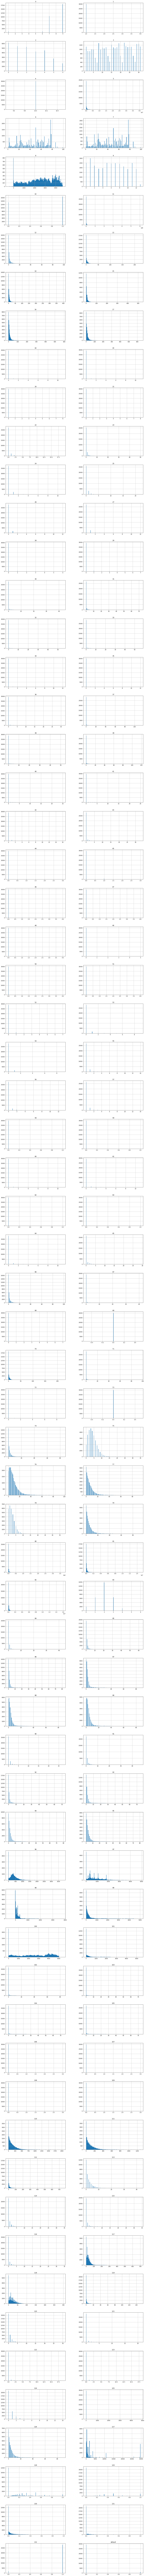

In [14]:
df.hist(figsize=(20, 400), bins=200, layout=(70,2))
plt.show()

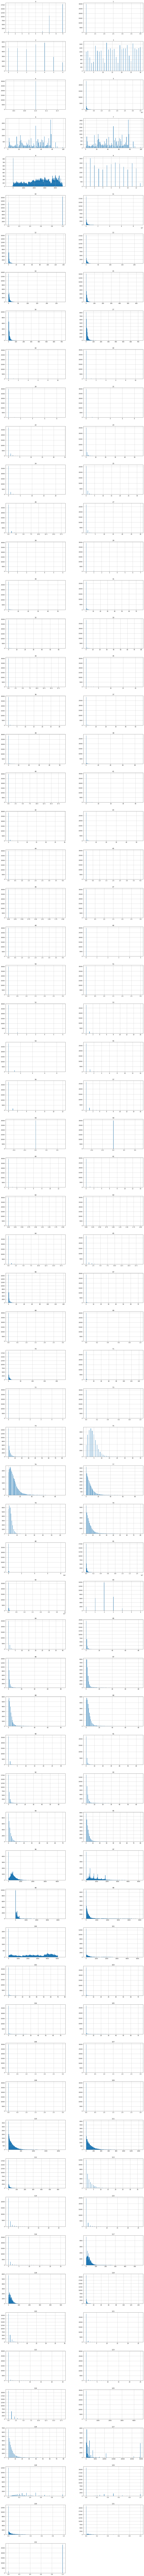

In [15]:
X_test.hist(figsize=(20, 400), bins=200, layout=(70,2))
plt.show()

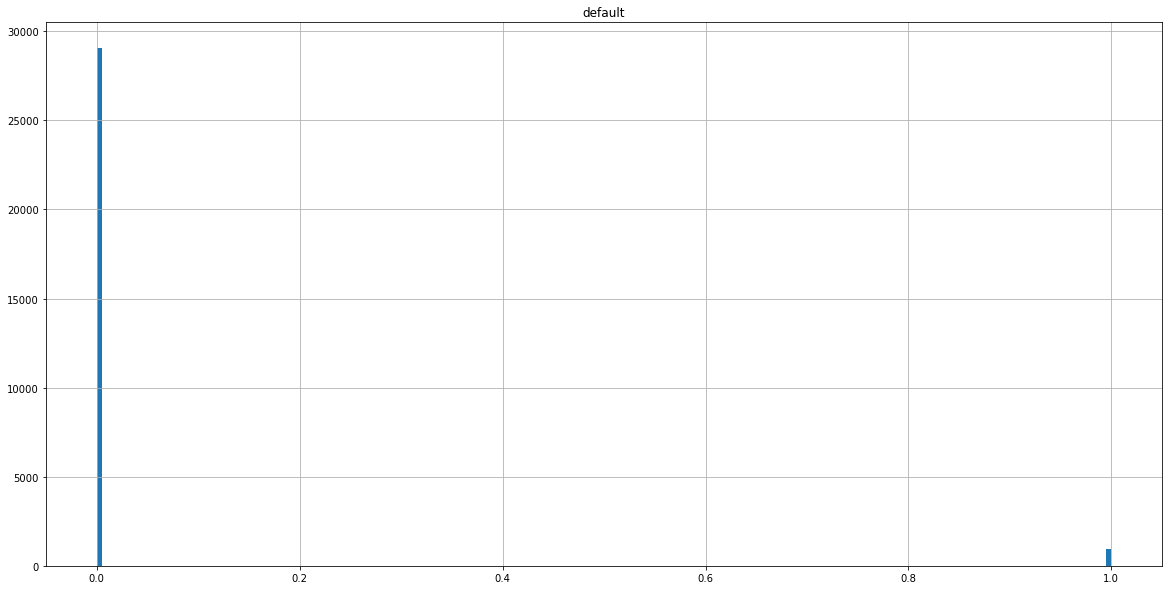

In [16]:
y_test.hist(figsize=(20, 10), bins=200)
plt.show()

Практически все распределения имеют "тяжёлый хвост", т.е. во многих признаках есть экстремальные значения. Не будем трактовать их как "выбросы", поскольку у нас нет информации касательно анонимизированных признаков, будем просто считать это особенностью данных.

---
**Вывод**: завершив этап подготовки данных, мы обнаружили, что
- в обучающем и тестовом датасете есть пропуски в признаках 6, 7, 9 и 10; займёмся их анализом и обработкой в следующем разделе;
- большая часть признаков имеет тяжелохвостовые распределения, т.е. в них содержатся экстремальные значения; поскольку у нас нет информации касательно анонимизированных признаков, будем считать это особенностью данных, а не выбросами;
- на всякий случай, имеет смысл проверить данные на дубликаты;
- данные не стандартизированы, исправим это в дальнейшем в пайплайне;
- у нас имеется сильный дисбаланс классов - 3 к 100, баланс в обучающей и тестовой выборке примерно одинаковый, т.е. выборки репрезентативны; с дисбалансом классов мы будем бороться при обучении моделей, выбирая специальные гиперпараметры.

## Предобработка данных

### Анализ и устранение пропусков

Как мы обнаружили ранее, у нас имеются пропуски в признаках 6, 7, 9, 10 в обучающей и тестовой выборке. Поскольку у нас нет данных, что это за признаки, было бы некорректно пытаться заполнить их средним или медианой. Попробуем их вырезать и посмотреть на баланс классов- сильно ли тот нарушится.

Для начала, оценим процент строк с пропусками:

In [17]:
print('Процент строк с пропусками у обучающего набора данных:', (df.shape[0] - df.dropna().shape[0])/df.shape[0])

Процент строк с пропусками у обучающего набора данных: 0.04562268803945746


In [18]:
print('Процент строк с пропусками у тестового набора данных:',(X_test.shape[0] - X_test.dropna().shape[0])/X_test.shape[0])

Процент строк с пропусками у тестового набора данных: 0.039942653285766676


Теперь скопируем датасеты в новые переменные и избавимся от пропусков, чтобы оценить как это скажется на балансе классов.

In [19]:
df_wout_na = df.copy()

X_test['default'] = y_test['default']
X_test_wout_na = X_test.copy()

In [20]:
df_wout_na = df_wout_na.dropna(how='any')
X_test_wout_na = X_test_wout_na.dropna(how='any')

In [21]:
print(f'Баланс классов обучающей выборки до удаления пропусков: {df["default"].mean()}.')
print(f'Баланс классов обучающей выборки после удаления пропусков: {df_wout_na["default"].mean()}.')

Баланс классов обучающей выборки до удаления пропусков: 0.03332555736994701.
Баланс классов обучающей выборки после удаления пропусков: 0.03376632446399888.


In [22]:
print(f'Баланс классов тестовой выборки до удаления пропусков: {y_test["default"].mean()}.')
print(f'Баланс классов тестовой выборки после удаления пропусков: {X_test_wout_na["default"].mean()}.')

Баланс классов тестовой выборки до удаления пропусков: 0.03127396392491581.
Баланс классов тестовой выборки после удаления пропусков: 0.031533252300746654.


Отлично, баланс классов не пострадал! Скопируем обновлённые датасеты в прежние переменные.

In [23]:
df = df_wout_na.copy()

X_test = X_test_wout_na.copy()

### Проверка на дубликаты

На всякий случай, проверим данные на явные дубликаты:

In [24]:
df.duplicated().sum()

6

In [25]:
X_test.duplicated().sum()

12

Дубликаты обнаружены! Удалим их:

In [26]:
df = df.drop_duplicates()
X_test = X_test.drop_duplicates()

### Проверка на мультиколлинеарность и анализ корреляций

Посмотрим на тепловую карту корреляций Пирсона. Из-за большого количества признаков мы не сможем детально оценить её, но обнаружить мультиколлинеарность сможем.

In [ ]:
fig, ax = plt.subplots(figsize=(200, 200))

sns.heatmap(
    df.corr(),
    annot_kws={'size': 40},
    annot=True,
    mask=np.triu(np.ones_like(df.corr()))
)

ax.set_xticklabels(df.columns, rotation=90, fontsize=40)
ax.set_yticklabels(df.columns, rotation=360, fontsize=40)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=80)

plt.show()

Как мы видим, **проблема мультиколлинеарности в данных есть**, что побуждает нас к тому, что либо использовать в качестве модели одну из "деревянных", либо в логистической регрессии обязательно применять L2-регуляризацию, чтобы улучшить интерпретируемость результатов.

---
Посмотрим на тепловую карту 𝜙𝐾, чтобы оценить силу нелинейных корреляций.

In [28]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', 'default']


Not enough unique value for variable 4 for analysis 1. Dropping this column
Not enough unique value for variable 69 for analysis 1. Dropping this column
Not enough unique value for variable 73 for analysis 1. Dropping this column


In [ ]:
fig, ax = plt.subplots(figsize=(200, 200))

sns.heatmap(
    phik_overview,
    annot_kws={'size': 40},
    annot=True,
    mask=np.triu(np.ones_like(phik_overview))
)

ax.set_xticklabels(phik_overview.columns, rotation=90, fontsize=40)
ax.set_yticklabels(phik_overview.columns, rotation=360, fontsize=40)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=80)


plt.title(r'correlation $\phi_K$')
plt.show()

Как мы видим (и на тепловой карте Пирсона и на 𝜙𝐾), для целевого признака "default" корреляции с другими признаками не превышает 0.3, что соответствует слабой корреляции.

### Разбиение данных на выборки

Кроме обучающего и тестового набора данных, нам понадобится валидационный - чтобы подбирать порог (threshold) предсказания.
Разобьём обучающую выборку ещё и на валидационную - в соотношении 9 к 1.

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(
    df.drop(['default'], axis=1), # признаки
    df['default'], # таргет
    test_size=0.1,
    random_state=random_state,
    stratify=df['default']
)

X_train.shape, X_valid.shape

((25768, 133), (2864, 133))

Проверим баланс классов после разбиения:

In [31]:
y_train.mean(), y_valid.mean()

(0.033723998758149645, 0.033868715083798885)

Баланс есть.

---
Подготовим тестовый набор данных:

In [32]:
del y_test
y_test = X_test['default']

X_test = X_test.drop(columns=['default'])

Отлично, наши наборы подготовлены.

---
**Вывод**: закончив этап предобработки данных, мы
- удалили пропуски из обучающего и тестового набора данных, т.к. мы не знаем, что это за признаки с пропусками (из-за анонимизации данных) и корректней будет вырезать пропуски, чем заполнять их медианой/средним; всего пропусков было 4% и 3% в обучающем и тестовом наборе данных; после удаления пропусков баланс классов существенно не изменился;
- проверили данные на дубликаты и удалили их;
- проверили данные на **мультиколлинеарность - она есть**, что вынуждает нас либо использовать "деревянные" модели, либо логистическую регрессию с L2-регуляризацией;
- разбили обучающую выборку на обучающую и валидационную в соотношении 9:1; валидационная понадобится нам для настройки порога предсказаний (threshold); подготовили тестовую выборку.

## Обучение моделей

### Подготовка preprocessing-шага для pipeline'ов

Подготовим препроцессинг-шаг для наших пайплайнов. Он будет включать в себя стандартизацию всех числовых признаков и заполнение пропусков медианами (хоть в данном проекте мы и вырезали все строки с пропусками, данное заполнение медианами потребуется для работы скрипта).

In [33]:
preprocessor = Pipeline([
    # == Заполнение пропусков медианами ====
    ('median_imputer', SimpleImputer(strategy='median')),
    # == Стандартизация признаков ====
    ('standard_scaler', StandardScaler())
])

### Построение моделей

Мы построим три модели:
- логистическую регрессию;
- случайный лес;
- градиентный бустинг CatBoost.

Для каждой модели мы будем использовать пайплайн и кросс-валидацию на 8 фолдах. Учитываем дисбаланс классов, используя взвешивание классов через гиперпараметр "class_weight".

Мы будем считать метрику AUC-ROC и трансформировать её в gini как (2\*AUC-ROC - 1).

In [34]:
# Для сводной таблицы
model = []
gini_score = []

#### Логистическая регрессия

In [35]:
%%time

lr_pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LogisticRegression())
])

parameter_space = {
    'model__penalty' : ['l2'],
    'model__max_iter' : [300],
    'model__class_weight' : ['balanced'],
    'model__C'       : np.logspace(0.1,10,1),
    'model__solver'  : ['newton-cholesky'],
    'model__random_state' : [random_state]
}

lr_grid = GridSearchCV(lr_pipe, parameter_space, scoring='roc_auc', cv=8, n_jobs=n_jobs)

lr_grid.fit(X_train, y_train)

lr_best = lr_grid.best_estimator_
lr_best_roc_auc = lr_grid.best_score_

CPU times: user 1.49 s, sys: 91.8 ms, total: 1.58 s
Wall time: 4.39 s


In [36]:
model.append('Logistic regression')
gini_score.append(2*lr_best_roc_auc - 1)

print(f'Лучшая модель логистической регрессии показала gini: {2*lr_best_roc_auc - 1}.')
print(f'Гиперпараметры:')
lr_best

Лучшая модель логистической регрессии показала gini: 0.6042304564519803.
Гиперпараметры:


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('median_imputer',
                                  SimpleImputer(strategy='median')),
                                 ('standard_scaler', StandardScaler())])),
                ('model',
                 LogisticRegression(C=1.2589254117941673,
                                    class_weight='balanced', max_iter=300,
                                    random_state=42,
                                    solver='newton-cholesky'))])

#### Случайный лес

In [37]:
%%time

rfc_pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier())
])

parameter_space = {
    'model__max_depth' : [7, 10, 15],
    'model__n_estimators' : [100, 200, 400],
    'model__max_features' : [4, 6],
    'model__random_state' : [random_state],
    'model__class_weight' : ['balanced']
}

rfc_grid = GridSearchCV(rfc_pipe, parameter_space, scoring='roc_auc', cv=8, n_jobs=n_jobs)

rfc_grid.fit(X_train, y_train)

rfc_best = rfc_grid.best_estimator_
rfc_best_roc_auc = rfc_grid.best_score_

CPU times: user 6.19 s, sys: 474 ms, total: 6.66 s
Wall time: 2min 36s


In [38]:
model.append('Random Forest')
gini_score.append(2*rfc_best_roc_auc - 1)

print(f'Лучшая модель случайного леса показала gini: {2*rfc_best_roc_auc - 1}.')
print(f'Гиперпараметры:')
rfc_best

Лучшая модель случайного леса показала gini: 0.6166706299985454.
Гиперпараметры:


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('median_imputer',
                                  SimpleImputer(strategy='median')),
                                 ('standard_scaler', StandardScaler())])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=7,
                                        max_features=6, n_estimators=200,
                                        random_state=42))])

#### Градиентный бустинг CatBoost

In [39]:
%%time

cbc_pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', CatBoostClassifier())
])

parameter_space = {
    'model__num_trees' : [100, 200, 400], 
    'model__depth'     : [3, 6],
    'model__learning_rate' : [0.03, 0.1],
    'model__random_state' : [random_state],
    'model__auto_class_weights' : ['Balanced'],
    'model__silent' : [True]
}

cbc_grid = GridSearchCV(cbc_pipe, parameter_space, scoring='roc_auc', cv=8, n_jobs=n_jobs)

cbc_grid.fit(X_train, y_train)

cbc_best = cbc_grid.best_estimator_
cbc_best_roc_auc = cbc_grid.best_score_

CPU times: user 53.2 s, sys: 3.97 s, total: 57.2 s
Wall time: 5min 24s


In [40]:
model.append('Gradient boosting CatBoost')
gini_score.append(2*cbc_best_roc_auc - 1)

print(f'Лучшая модель CatBoost показала gini: {2*cbc_best_roc_auc - 1}.')
print(f'Гиперпараметры:')

cbc_results = pd.DataFrame(cbc_grid.cv_results_)
cbc_results[cbc_results['rank_test_score'] == 1]['params'].to_dict()

Лучшая модель CatBoost показала gini: 0.7223783673736481.
Гиперпараметры:


{8: {'model__auto_class_weights': 'Balanced',
  'model__depth': 6,
  'model__learning_rate': 0.03,
  'model__num_trees': 400,
  'model__random_state': 42,
  'model__silent': True}}

---
**Вывод:** завершив этап обучения моделей, мы
- подготовили препроцессинг-шаг для пайплайнов, включающий в себя стандартизацию числовых признаков и заполнение пропусков медианами (потребуется для работы скрипта);
- приняли решения:
    - использовать кросс-валидацию в 8 фолдов;
    - в качестве метрики использовать gini (что алгебраически эквивалентно (2\*ROC-AUC - 1));
    - обязательно использовать взвешивание классов;
- построили три модели - логистическую регресиию, случайный лес и градиентный бустинг CatBoost и собрали статистику по показателям метрик для этих моделей.

## Анализ моделей

### Выбор лучшей модели

Посмотрим на результаты наших моделей, выберем лучшую.

In [41]:
models_dict = {'model' : model, 'gini_score' : gini_score}
models_results = pd.DataFrame(models_dict)
models_results

,model,gini_score
0,Logistic regression,0.604230
1,Random Forest,0.616671
2,Gradient boosting CatBoost,0.722378


Лучше всех себя показал градиентный бустинг CatBoost, выбираем его!

In [42]:
model_best = cbc_grid

Сохраним пайплайн с моделью для дальнейшего использования в скрипте:

In [43]:
joblib.dump(model_best, 'model_for_script.pkl', compress=1)

['model_for_script.pkl']

### Настройка порога

Мы выбрали лучшую модель. Теперь настроим для неё порог, по которому мы будем классифицировать принадлежность к классам. В качестве метрики будем использовать f1-меру, т.к. она учитывает и точность (precision) и полноту (recall).

Настраивать порог будем на валидационной выборке.

In [44]:
probas_valid = model_best.predict_proba(X_valid) # Сбор проб на принадлежность к классам

best_threshold=0 # Лучший порог
best_f1=0 # Лучшая f1-мера

thr_res = []
precision_res = []
recall_res = []
f1_res = []

for threshold in np.arange(0.01, 0.99, 0.01):
    
    probas_threshold = np.where(probas_valid[:, 1] >= threshold, 1, 0) # Получаем предсказания по порогу
    
    f1 = f1_score(y_valid, probas_threshold) # Вычисляем f1-меру
    precision = precision_score(y_valid, probas_threshold)
    recall = recall_score(y_valid, probas_threshold)
    
    thr_res.append(threshold)
    precision_res.append(precision)
    recall_res.append(recall)
    f1_res.append(f1)
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
        
thr_dict = {'threshold' : thr_res,
            'precision' : precision_res,
            'recall' : recall_res,
            'f1' : f1_res}
thr_results = pd.DataFrame(thr_dict)        

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [45]:
print(f'Лучшая f1-мера - {best_f1} при пороге {best_threshold}')

Лучшая f1-мера - 0.3670886075949367 при пороге 0.8


Как мы видим, лучшая f1-мера достигается при пороге 0.8. Но что, если заказчику важна метрика полноты (recall)? Давайте посмотрим компромисс между лучшей полнотой и хоть какой-то точностью (precision):

In [46]:
thr_results[30:50]

,threshold,precision,recall,f1
30,0.31,0.078717,0.835052,0.143872
31,0.32,0.081736,0.835052,0.148897
32,0.33,0.083595,0.824742,0.151803
33,0.34,0.085963,0.814433,0.155512
34,0.35,0.087739,0.804124,0.158215
35,0.36,0.092199,0.804124,0.165429
36,0.37,0.092910,0.783505,0.166120
37,0.38,0.094697,0.773196,0.168729
38,0.39,0.096354,0.762887,0.171098
39,0.40,0.100955,0.762887,0.178313


Порог 0.42 даёт точность (precision) 0.11 и полноту (recall) 0.76. Запомним в том числе и его.

In [47]:
threshold_best_f1 = best_threshold
threshold_best_recall = 0.42

### Валидация на тестовом наборе данных

Давайте расчитаем наши метрики на тестовом наборе данных, используя нашу лучшую модель:

In [48]:
y_pred_proba = model_best.predict_proba(X_test)
print('Gini на тестовом наборе данных:', (2*roc_auc_score(y_test, y_pred_proba[:,1]) - 1))

Gini на тестовом наборе данных: 0.6928766322277315


Теперь сформируем прогнозы с нашими 2мя порогами и посчитаем основные метрики:

In [49]:
probas_threshold = np.where(y_pred_proba[:, 1] >= threshold_best_f1, 1, 0)
    
print('Для порога', threshold_best_f1)
print('   - F1-мера равна', f1_score(y_test, probas_threshold))
print('   - Precision равна', precision_score(y_test, probas_threshold))
print('   - Recall равна', recall_score(y_test, probas_threshold))

Для порога 0.8
   - F1-мера равна 0.2679496669133975
   - Precision равна 0.40857787810383744
   - Recall равна 0.19933920704845814


In [50]:
probas_threshold = np.where(y_pred_proba[:, 1] >= threshold_best_recall, 1, 0)
    
print('Для порога', threshold_best_recall)
print('   - F1-мера равна', f1_score(y_test, probas_threshold))
print('   - Precision равна', precision_score(y_test, probas_threshold))
print('   - Recall равна', recall_score(y_test, probas_threshold))

Для порога 0.42
   - F1-мера равна 0.18171698900793098
   - Precision равна 0.10399745182353878
   - Recall равна 0.7191629955947136


### Проверка на адекватность

Проверим на адекватность нашу модель. Построим модель-пустышку, которая предсказывает всё время 1:

In [51]:
%%time

dummy_1 = Pipeline(steps = [
    ('model', DummyClassifier(strategy='constant', constant=1))])

dummy_1.fit(X_train, y_train)

print()


CPU times: user 2.37 ms, sys: 173 µs, total: 2.54 ms
Wall time: 2.07 ms


In [52]:
predictions_1 = dummy_1.predict(X_test)

print(f'Модель-пустышка, предсказывающая 1 показала на тестовом наборе данных ')
print('    - Gini, равную ', (2*roc_auc_score(y_test, predictions_1) - 1))
print('    - F1, равную ', f1_score(y_test, predictions_1))
print('    - Precision, равную ', precision_score(y_test, predictions_1))
print('    - Recall, равную ', recall_score(y_test, predictions_1))

Модель-пустышка, предсказывающая 1 показала на тестовом наборе данных 
    - Gini, равную  0.0
    - F1, равную  0.06116331548280624
    - Precision, равную  0.03154639891602682
    - Recall, равную  1.0


Модель-пустышка показала крайне низкие результаты. Наша модель адекватна.

### Анализ важности факторов

Давайте оценим важность факторов нашей модели, чтобы понимать какие показатели и как влияют на прогноз.

In [53]:
explainer = shap.TreeExplainer(model_best.best_estimator_.named_steps['model'])
shap_values = explainer.shap_values(model_best.best_estimator_[:-1].transform(X_test))

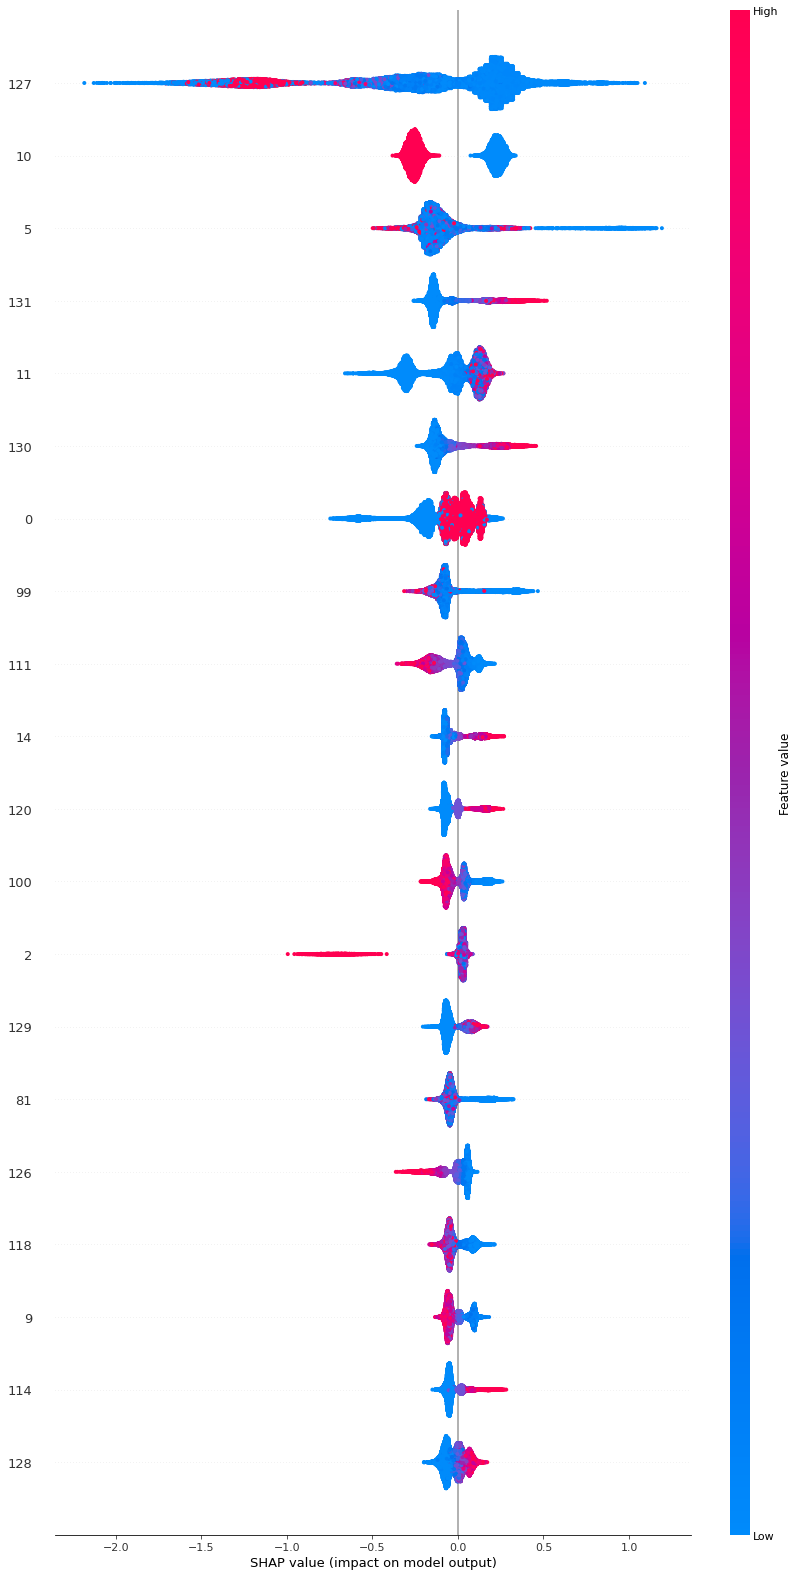

In [54]:
shap.summary_plot(shap_values, X_test, plot_size=[12,22])

Итак, можно утверждать, что
- высокие значения признаков 0, 11, 14, 114, 120, 128, 129, 130, 131 указывали на большую принадлежность к классу 1 ("дефолт");
- низкие значения признаков 9, 10, 100, 111, 118, 126 указывали на большую принадлежность к классу 1 ("дефолт");
- признаки 0, 2, 5, 81, 99, 127 обобщённо оказывали смешанное и противоречивое влияние на принадлежность к классу 1 ("дефолт") - т.е. их влияние менялось в зависимости от конкретных наблюдений ("клиентов").

Все указанные признаки в наибольшей степени влияли на прогноз, в отличие от неуказанных.

---
**Вывод**: завершив этап анализа моделей, мы
- выбрали лучшую модель - градиентный бустинг CatBoost, который показал gini, равную 0.72 на обучающем наборе данных; сохранили модель для дальнейшего использования в скрипте;
- настроили пороги на валидационном наборе данных:
    - порог бинаризации 0.8 показал лучшую f1-меру в 0.37;
    - порог бинаризации 0.42 показал лучший компромисс между хорошей полнотой (recall) в 0.76 и малой точностью (precision) в 0.11;
- провалидировали нашу лучшую модель **на тестовом наборе данных - gini в 0.69**;
- проверили нашу модель на адекватность, построив модель пустышку, предсказывающую всегда 1 класс; наша модель адекватна;
- завершив анализ важности факторов, можно утверждать, что
    - высокие значения признаков 0, 11, 14, 114, 120, 128, 129, 130, 131 указывали на большую принадлежность к классу 1 ("дефолт");
    - низкие значения признаков 9, 10, 100, 111, 118, 126 указывали на большую принадлежность к классу 1 ("дефолт");
    - признаки 0, 2, 5, 81, 99, 127 обобщённо оказывали смешанное и противоречивое влияние на принадлежность к классу 1 ("дефолт") - т.е. их влияние менялось в зависимости от конкретных наблюдений ("клиентов").
    - все указанные признаки в наибольшей степени влияли на прогноз, в отличие от неуказанных.

## Общий вывод

Отвечая сразу на главный вопрос проекта: предлагаем для предсказания дефолта использовать обученную нами модель градиентного бустинга CatBoost, **которая показывает gini на тестовом наборе данных, равную 0.69**. Также предлагаем использовать пороги бинаризации в 0.8 (если важна f1-мера) и 0.42 (если важна полнота (recall)).

В целом, в ходе проекта

- завершив этап подготовки данных, мы обнаружили, что
    - в обучающем и тестовом датасете есть пропуски в признаках 6, 7, 9 и 10; займёмся их анализом и обработкой в следующем разделе;
    - большая часть признаков имеет тяжелохвостовые распределения, т.е. в них содержатся экстремальные значения; поскольку у нас нет информации касательно анонимизированных признаков, будем считать это особенностью данных, а не выбросами;
    - на всякий случай, имеет смысл проверить данные на дубликаты;
    - данные не стандартизированы, исправим это в дальнейшем в пайплайне;
    - у нас имеется сильный дисбаланс классов - 3 к 100, баланс в обучающей и тестовой выборке примерно одинаковый, т.е. выборки репрезентативны; с дисбалансом классов мы будем бороться при обучении моделей, выбирая специальные гиперпараметры;
    
    
- закончив этап предобработки данных, мы
    - удалили пропуски из обучающего и тестового набора данных, т.к. мы не знаем, что это за признаки с пропусками (из-за анонимизации данных) и корректней будет вырезать пропуски, чем заполнять их медианой/средним; всего пропусков было 4% и 3% в обучающем и тестовом наборе данных; после удаления пропусков баланс классов существенно не изменился;
    - проверили данные на дубликаты и удалили их;
    - проверили данные на **мультиколлинеарность - она есть**, что вынуждает нас либо использовать "деревянные" модели, либо логистическую регрессию с L2-регуляризацией;
    - разбили обучающую выборку на обучающую и валидационную в соотношении 9:1; валидационная понадобится нам для настройки порога предсказаний (threshold); подготовили тестовую выборку;
    
    
- завершив этап обучения моделей, мы
    - подготовили препроцессинг-шаг для пайплайнов, включающий в себя стандартизацию числовых признаков и заполнение пропусков медианами (потребуется для работы скрипта);
    - приняли решения:
        - использовать кросс-валидацию в 8 фолдов;
        - в качестве метрики использовать gini (что алгебраически эквивалентно (2\*ROC-AUC - 1));
        - обязательно использовать взвешивание классов;
    - построили три модели - логистическую регресиию, случайный лес и градиентный бустинг CatBoost и собрали статистику по показателям метрик для этих моделей;


- завершив этап анализа моделей, мы
    - выбрали лучшую модель - градиентный бустинг CatBoost, который показал gini, равную 0.72 на обучающем наборе данных; сохранили модель для дальнейшего использования в скрипте;
    - настроили пороги на валидационном наборе данных:
        - порог бинаризации 0.8 показал лучшую f1-меру в 0.37;
        - порог бинаризации 0.42 показал лучший компромисс между хорошей полнотой (recall) в 0.76 и малой точностью (precision) в 0.11;
    - провалидировали нашу лучшую модель **на тестовом наборе данных - gini в 0.69**;
    - проверили нашу модель на адекватность, построив модель пустышку, предсказывающую всегда 1 класс; наша модель адекватна;
    - завершив анализ важности факторов, можно утверждать, что
        - высокие значения признаков 0, 11, 14, 114, 120, 128, 129, 130, 131 указывали на большую принадлежность к классу 1 ("дефолт");
        - низкие значения признаков 9, 10, 100, 111, 118, 126 указывали на большую принадлежность к классу 1 ("дефолт");
        - признаки 0, 2, 5, 81, 99, 127 обобщённо оказывали смешанное и противоречивое влияние на принадлежность к классу 1 ("дефолт") - т.е. их влияние менялось в зависимости от конкретных наблюдений ("клиентов").
        - все указанные признаки в наибольшей степени влияли на прогноз, в отличие от неуказанных.